In [3]:
# Titanic Survival

# packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

data = pd.read_csv('train.csv') # load the train data

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#data exploration
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploration of Train Data

In [5]:
#Explaining Dataset
#survived: 0=No, 1=Yes
#pclass: Ticket class 1=1st, 2=2nd, 3=3rd
#sibsp: Number of siblings/spouses aboard the Titanic
#parch: Number of parents/children aboard the Titanic
#embarked: Port of Embarkation C=Cherbourg, Q=Queenstown, S=Southampton

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#procentage of null values in age column
(data["Age"].isna().sum()/len(data["Age"]))*100

19.865319865319865

In [8]:
# replacing missing values in "Age" column with mean of that column
data['Age'] = data['Age'].fillna(data['Age'].mean())
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [9]:
#convert sex column to numerical values
df=pd.get_dummies(data['Sex'])
print(df)

     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]


In [10]:
#drop 'sex' column and add "sex_male" with integers
df=pd.get_dummies(data, columns=['Sex'],drop_first=True)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name        Age  SibSp  \
0                              Braund, Mr. Owen Harris  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.000000      1   
2                               Heikkinen, Miss. Laina  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.000000      1   
4                             Allen, Mr. William Henry  35.000000      0   
..                                                 ...        ...    ...   
886        

In [11]:
df = df.rename({'Sex_male': "Gender"}, axis=1)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,C,1


In [12]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

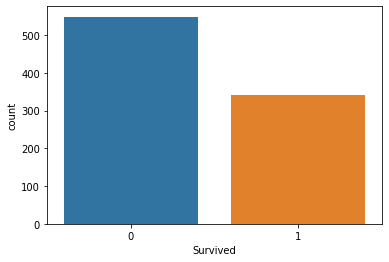

In [13]:
sns.countplot(x="Survived", data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

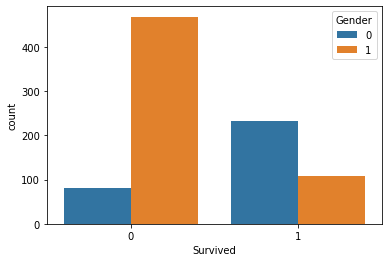

In [14]:
sns.countplot(x="Survived",hue="Gender",data=df)

In [15]:
df[['Gender','Survived']].groupby(['Gender']).sum().sort_values(by='Survived')

,Survived
Gender,
1,109
0,233


Gender: 1=male, 0=female
The number of male passengers who survived is less than the number of female.

<AxesSubplot:xlabel='Survived', ylabel='count'>

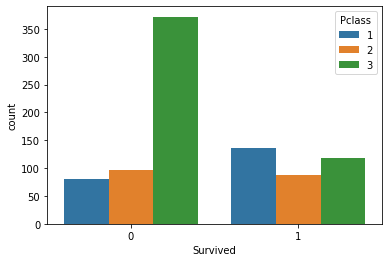

In [16]:
sns.countplot(x="Survived",hue="Pclass",data=df)

In [17]:
df[['Pclass','Survived']].groupby(['Pclass']).sum().sort_values(by='Survived')

,Survived
Pclass,
2,87
3,119
1,136


The number of passengers who travelled at first class and survived is greater than the others who travelled at second or third class. So Pclass is a contributing factor to a person's chance of survival.

<AxesSubplot:xlabel='Survived', ylabel='count'>

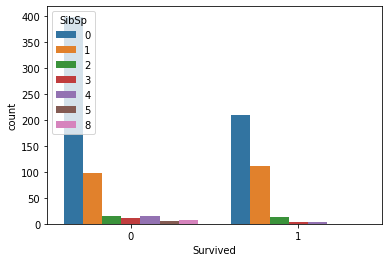

In [18]:
sns.countplot(x="Survived",hue="SibSp",data=df)

In [19]:
df[['SibSp','Survived']].groupby(['SibSp']).sum().sort_values(by='Survived')

,Survived
SibSp,
5,0
8,0
4,3
3,4
2,13
1,112
0,210


The passengers who travelled alone (no siblings or spouse) survived in a higher number. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

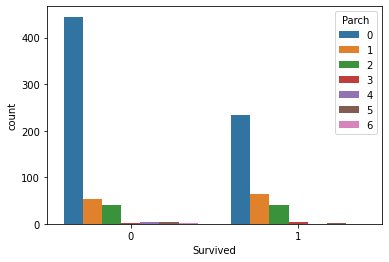

In [20]:
sns.countplot(x="Survived",hue="Parch",data=df)

In [21]:
df[['Parch','Survived']].groupby(['Parch']).sum().sort_values(by='Survived')

,Survived
Parch,
4,0
6,0
5,1
3,3
2,40
1,65
0,233


The passengers who travelled alone (no parents or chindren) survived in a higher number. 

In [22]:
#Drop "Cabin" column, which is not of much importance in this process
df=df.drop("Cabin",axis=1)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name        Age  SibSp  \
0                              Braund, Mr. Owen Harris  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.000000      1   
2                               Heikkinen, Miss. Laina  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.000000      1   
4                             Allen, Mr. William Henry  35.000000      0   
..                                                 ...        ...    ...   
886        

In [23]:
#Convert categorical column "Embarked" into integer type values
df=df.replace({"Embarked":{'S':0, 'C':1, 'Q':2}}) 
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,1.0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0.0,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,0.0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,0.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,0.0,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1.0,1


In [24]:
#Drop "Name" column, which is not of much importance in this process
df=df.drop("Name",axis=1)
print(df)

     PassengerId  Survived  Pclass        Age  SibSp  Parch            Ticket  \
0              1         0       3  22.000000      1      0         A/5 21171   
1              2         1       1  38.000000      1      0          PC 17599   
2              3         1       3  26.000000      0      0  STON/O2. 3101282   
3              4         1       1  35.000000      1      0            113803   
4              5         0       3  35.000000      0      0            373450   
..           ...       ...     ...        ...    ...    ...               ...   
886          887         0       2  27.000000      0      0            211536   
887          888         1       1  19.000000      0      0            112053   
888          889         0       3  29.699118      1      2        W./C. 6607   
889          890         1       1  26.000000      0      0            111369   
890          891         0       3  32.000000      0      0            370376   

        Fare  Embarked  Gen

In [25]:
#Drop "Ticket" column, which is not of much importance in this process
df=df.drop("Ticket",axis=1)
print(df)

     PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare  \
0              1         0       3  22.000000      1      0   7.2500   
1              2         1       1  38.000000      1      0  71.2833   
2              3         1       3  26.000000      0      0   7.9250   
3              4         1       1  35.000000      1      0  53.1000   
4              5         0       3  35.000000      0      0   8.0500   
..           ...       ...     ...        ...    ...    ...      ...   
886          887         0       2  27.000000      0      0  13.0000   
887          888         1       1  19.000000      0      0  30.0000   
888          889         0       3  29.699118      1      2  23.4500   
889          890         1       1  26.000000      0      0  30.0000   
890          891         0       3  32.000000      0      0   7.7500   

     Embarked  Gender  
0         0.0       1  
1         1.0       0  
2         0.0       0  
3         0.0       0  
4         0.0  

In [26]:
datatest = pd.read_csv('test.csv') # load the test data
datatest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


The number of samples into the test data is 418.

Exploration of Test Data

In [27]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
# null values in test data
datatest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
#procentage of null values in age column
(datatest["Age"].isna().sum()/len(data["Age"]))*100

9.652076318742985

In [30]:
#drop columns with objects (except of "Sex" and "Embarked" columns)
newdatatest = datatest.drop(["Name", "Ticket", "Cabin"], axis="columns")
newdatatest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [31]:
#convert sex column to numerical values
dftest=pd.get_dummies(newdatatest['Sex'])
print(dftest)

     female  male
0         0     1
1         1     0
2         0     1
3         0     1
4         1     0
..      ...   ...
413       0     1
414       1     0
415       0     1
416       0     1
417       0     1

[418 rows x 2 columns]


In [32]:
#drop 'sex' column and add "sex_male" with integers
dftest=pd.get_dummies(newdatatest, columns=['Sex'],drop_first=True)
print(dftest)

     PassengerId  Pclass   Age  SibSp  Parch      Fare Embarked  Sex_male
0            892       3  34.5      0      0    7.8292        Q         1
1            893       3  47.0      1      0    7.0000        S         0
2            894       2  62.0      0      0    9.6875        Q         1
3            895       3  27.0      0      0    8.6625        S         1
4            896       3  22.0      1      1   12.2875        S         0
..           ...     ...   ...    ...    ...       ...      ...       ...
413         1305       3   NaN      0      0    8.0500        S         1
414         1306       1  39.0      0      0  108.9000        C         0
415         1307       3  38.5      0      0    7.2500        S         1
416         1308       3   NaN      0      0    8.0500        S         1
417         1309       3   NaN      1      1   22.3583        C         1

[418 rows x 8 columns]


In [33]:
#rename "Sex_male" column with "Gender", 1=male, 0=female
dftest2 = dftest.rename({'Sex_male': "Gender"}, axis=1)
dftest2

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,892,3,34.5,0,0,7.8292,Q,1
1,893,3,47.0,1,0,7.0000,S,0
2,894,2,62.0,0,0,9.6875,Q,1
3,895,3,27.0,0,0,8.6625,S,1
4,896,3,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,S,1
414,1306,1,39.0,0,0,108.9000,C,0
415,1307,3,38.5,0,0,7.2500,S,1
416,1308,3,NaN,0,0,8.0500,S,1


In [34]:

# replacing missing values in "Age" column with mean of that column
dftest2['Age'] = dftest2['Age'].fillna(dftest2['Age'].mean())
dftest2

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,892,3,34.50000,0,0,7.8292,Q,1
1,893,3,47.00000,1,0,7.0000,S,0
2,894,2,62.00000,0,0,9.6875,Q,1
3,895,3,27.00000,0,0,8.6625,S,1
4,896,3,22.00000,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,S,1
414,1306,1,39.00000,0,0,108.9000,C,0
415,1307,3,38.50000,0,0,7.2500,S,1
416,1308,3,30.27259,0,0,8.0500,S,1


In [35]:
#check for missing values
dftest2.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Gender         0
dtype: int64

In [36]:
# replacing missing value in "Fare" column with mean of that column
dftest2['Fare'] = dftest2['Fare'].fillna(dftest2['Fare'].mean())
dftest2

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,892,3,34.50000,0,0,7.8292,Q,1
1,893,3,47.00000,1,0,7.0000,S,0
2,894,2,62.00000,0,0,9.6875,Q,1
3,895,3,27.00000,0,0,8.6625,S,1
4,896,3,22.00000,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,S,1
414,1306,1,39.00000,0,0,108.9000,C,0
415,1307,3,38.50000,0,0,7.2500,S,1
416,1308,3,30.27259,0,0,8.0500,S,1


In [37]:
#Convert categorical column "Embarked" into integer type values
dftest2=dftest2.replace({"Embarked":{'S':0, 'C':1, 'Q':2}}) 
dftest2

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,892,3,34.50000,0,0,7.8292,2,1
1,893,3,47.00000,1,0,7.0000,0,0
2,894,2,62.00000,0,0,9.6875,2,1
3,895,3,27.00000,0,0,8.6625,0,1
4,896,3,22.00000,1,1,12.2875,0,0
...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,1
414,1306,1,39.00000,0,0,108.9000,1,0
415,1307,3,38.50000,0,0,7.2500,0,1
416,1308,3,30.27259,0,0,8.0500,0,1


In [38]:
dftest2.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Gender         0
dtype: int64

In [39]:
#Training Dataset
print(df)

     PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare  \
0              1         0       3  22.000000      1      0   7.2500   
1              2         1       1  38.000000      1      0  71.2833   
2              3         1       3  26.000000      0      0   7.9250   
3              4         1       1  35.000000      1      0  53.1000   
4              5         0       3  35.000000      0      0   8.0500   
..           ...       ...     ...        ...    ...    ...      ...   
886          887         0       2  27.000000      0      0  13.0000   
887          888         1       1  19.000000      0      0  30.0000   
888          889         0       3  29.699118      1      2  23.4500   
889          890         1       1  26.000000      0      0  30.0000   
890          891         0       3  32.000000      0      0   7.7500   

     Embarked  Gender  
0         0.0       1  
1         1.0       0  
2         0.0       0  
3         0.0       0  
4         0.0  

In [40]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Gender         0
dtype: int64

In [41]:
# replacing missing values in "Embarked" column with mean of that column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mean())
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,1,0,3,22.000000,1,0,7.2500,0.0,1
1,2,1,1,38.000000,1,0,71.2833,1.0,0
2,3,1,3,26.000000,0,0,7.9250,0.0,0
3,4,1,1,35.000000,1,0,53.1000,0.0,0
4,5,0,3,35.000000,0,0,8.0500,0.0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,1
887,888,1,1,19.000000,0,0,30.0000,0.0,0
888,889,0,3,29.699118,1,2,23.4500,0.0,0
889,890,1,1,26.000000,0,0,30.0000,1.0,1


In [42]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Gender         0
dtype: int64

In [43]:
#Test Dataset
print(dftest2)

     PassengerId  Pclass       Age  SibSp  Parch      Fare  Embarked  Gender
0            892       3  34.50000      0      0    7.8292         2       1
1            893       3  47.00000      1      0    7.0000         0       0
2            894       2  62.00000      0      0    9.6875         2       1
3            895       3  27.00000      0      0    8.6625         0       1
4            896       3  22.00000      1      1   12.2875         0       0
..           ...     ...       ...    ...    ...       ...       ...     ...
413         1305       3  30.27259      0      0    8.0500         0       1
414         1306       1  39.00000      0      0  108.9000         1       0
415         1307       3  38.50000      0      0    7.2500         0       1
416         1308       3  30.27259      0      0    8.0500         0       1
417         1309       3  30.27259      1      1   22.3583         1       1

[418 rows x 8 columns]


In [44]:
dftest2.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Gender         0
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train = df.drop('Survived', axis = 1)
X_test = dftest2
y_train = df['Survived']

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

/home/crimarin007/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
log_reg.score(X_test, y_pred)

1.0

In [47]:
len(X_train)

891

In [48]:
len(X_test)

418

In [49]:
len(y_train)

891

In [55]:
len(y_pred)

418